In [13]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def gru_cell_forward(xt, a_prev, parameters):
    """
    Forward propagation for the GRU cell.
    """
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Waz = parameters["Waz"]
    War = parameters["War"]
    ba = parameters["ba"]
    bz = parameters["bz"]
    br = parameters["br"]
    
    # Update gate
    zt = sigmoid(np.dot(Waz, a_prev) + np.dot(Wax, xt) + bz)
    # Reset gate
    rt = sigmoid(np.dot(War, a_prev) + np.dot(Wax, xt) + br)
    
    # Candidate hidden state
    a_next_candidate = tanh(np.dot(Waa, a_prev * rt) + np.dot(Wax, xt) + ba)
    
    # Final hidden state
    a_next = zt * a_prev + (1 - zt) * a_next_candidate
    
    cache = (a_next, a_prev, xt, parameters)
    
    return a_next, cache

# Parameter initialization (these are not real values, just for demonstration)
np.random.seed(1)
parameters = {
    "Wax": np.random.randn(5, 10),
    "Waa": np.random.randn(5, 5),
    "Waz": np.random.randn(5, 5),
    "War": np.random.randn(5, 5),
    "ba": np.random.randn(5, 1),
    "bz": np.random.randn(5, 1),
    "br": np.random.randn(5, 1)
}

# Input data (example)
xt = np.random.randn(10, 1) # Input at time step t
a_prev = np.random.randn(5, 1) # Hidden state at t-1

# Forward pass
a_next, cache = gru_cell_forward(xt, a_prev, parameters)



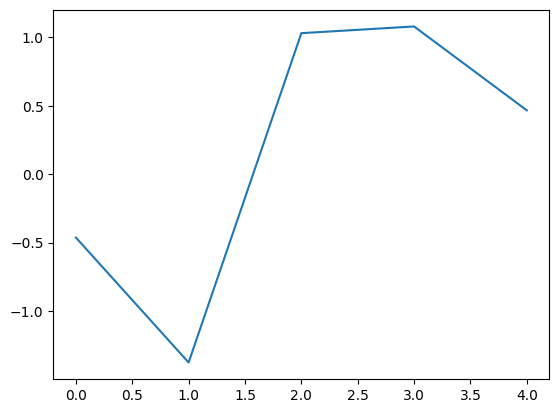

In [8]:
import matplotlib.pyplot as plt
plt.plot(a_next)